Figure out what minimum budget you need to get a movie with the best chances of success
Group everything by year
add column with percentage of movie budget vs budget for movies that year
add column with percentage of movie grossing worldwide vs grossing worldwide for movies that year
add column that does a ratio for percent budget and percent grossing. budget % / grossing %. sort lowest to greatest to get movies that did the best with lower budgets.

Take buckets to see what percentage of movies did well with different buckets of budget amounts

In [87]:
#Imports
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


Read in Dataframe and analyze data types and info about structure

In [88]:
#Read in the data
imdb_all_years_df = pd.read_csv("imdb_all_years.csv")
imdb_all_years_df.info()
imdb_all_years_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Movie Link             33600 non-null  object 
 2   Year                   33600 non-null  int64  
 3   Duration               33379 non-null  object 
 4   MPA                    25624 non-null  object 
 5   Rating                 33462 non-null  float64
 6   Votes                  33462 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         18222 non-null  float64
 9   gross_US_Canada        17571 non-null  float64
 10  opening_weekend_Gross  15523 non-null  float64
 11  directors              33600 non-null  object 
 12  writers                33600 non-null  object 
 13  stars                  33600 non-null  object 
 14  genres                 33600 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,1. Swiss Family Robinson,https://www.imdb.com/title/tt0054357/?ref_=sr_t_1,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,2. Psycho,https://www.imdb.com/title/tt0054215/?ref_=sr_t_2,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,3. The Apartment,https://www.imdb.com/title/tt0053604/?ref_=sr_t_3,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,4. Spartacus,https://www.imdb.com/title/tt0054331/?ref_=sr_t_4,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,5. Breathless,https://www.imdb.com/title/tt0053472/?ref_=sr_t_5,1960,1h 30m,Not Rated,7.7,90K,400000.0,594039.0,414173.0,...,"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...","['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,1960.0


Clean Up Data

In [89]:
#replace NaN with 0
imdb_all_years_df = imdb_all_years_df.fillna(0)
# imdb_all_years_df = imdb_all_years_df.dropna(how="any")

#Clean Up Title Data
for i in range(0, imdb_all_years_df['Title'].count()):   
    imdb_all_years_df.loc[i, 'Title'] = re.sub(r'[0-9]*[.]', '', imdb_all_years_df['Title'].iloc[i])

In [91]:
# imdb_all_years_df['Title'] = imdb_all_years_df['Title'].str.replace(r'[0-9]*[.]', '')

#convert title column to string dtype
imdb_all_years_df["Votes"] = imdb_all_years_df["Votes"].astype(int)
imdb_all_years_df['Title'] = imdb_all_years_df['Title'].astype(str)
imdb_all_years_df['Movie Link'] = imdb_all_years_df['Title'].astype(str)


imdb_all_years_df.dtypes

Title                     object
Movie Link                object
Year                       int64
Duration                  object
MPA                       object
Rating                   float64
Votes                      int32
budget                   float64
grossWorldWide           float64
gross_US_Canada          float64
opening_weekend_Gross    float64
directors                 object
writers                   object
stars                     object
genres                    object
countries_origin          object
filming_locations         object
production_companies      object
Languages                 object
wins                       int64
nominations                int64
oscars                     int64
release_date             float64
dtype: object

In [99]:
#sort values by year
imbd_all_years_df = imdb_all_years_df.sort_values(by='Year')

#group by year, title and grossWorldWide and display dataframe
group_by_year_imbd_all_years_df = imdb_all_years_df.groupby(['Year', 'Title'])['grossWorldWide'].mean()

Group and graph data showing worldwide gross of movies over time

<BarContainer object of 33600 artists>

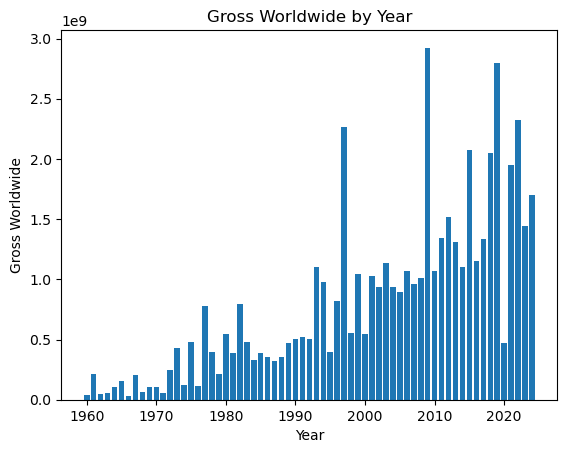

In [ ]:
#Plot a bar graph with the year on the x-axis and the gross worldwide on the y-axis
plt.title("Average Gross Worldwide by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross Worldwide')

plt.locator_params(axis='y', nbins=10) 
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['grossWorldWide'])

<BarContainer object of 33600 artists>

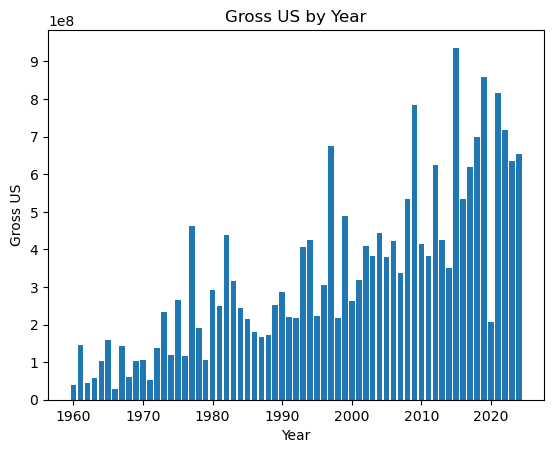

In [103]:
#Plot a bar graph with the year on the x-axis and the gross US on the y-axis
plt.title("Average Gross US by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross US')

plt.locator_params(axis='y', nbins=10) 
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['gross_US_Canada'])

In [112]:
#Add new column for profit
imdb_all_years_df['Profit'] =  imdb_all_years_df['grossWorldWide'] - imdb_all_years_df['budget']
#Add new column for profit margin
imdb_all_years_df['Profit Margin'] = imdb_all_years_df['Profit'] / imdb_all_years_df['budget']
#add new column for ratio of budget to grossWorldWide
imdb_all_years_df['Budget to Gross Ratio'] = imdb_all_years_df['budget'] / imdb_all_years_df['grossWorldWide']

<BarContainer object of 33600 artists>

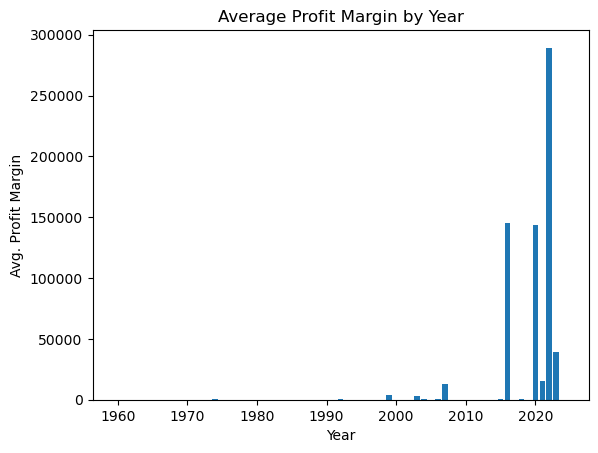

In [110]:
#Plot a bar graph with the year on the x-axis and the profit marign on the y-axis
plt.title("Average Profit Margin by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Profit Margin')
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Profit Margin'])

<BarContainer object of 33600 artists>

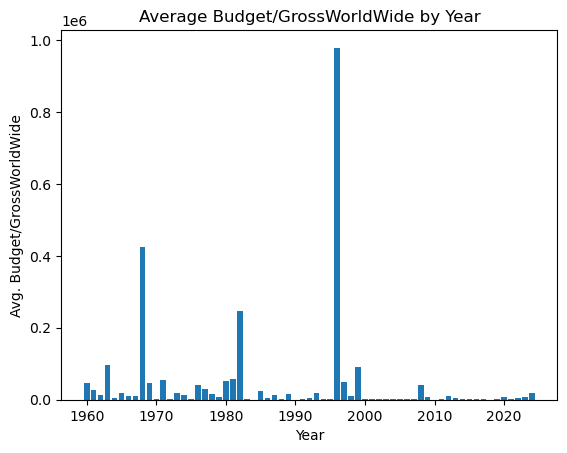

In [115]:
#Plot a bar graph with the year on the x-axis and the budget to grossworldwide on the y-axis
plt.title("Average Budget/GrossWorldWide by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Budget/GrossWorldWide')
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Budget to Gross Ratio'])

In [ ]:
#Its Clear from the above graph that movies on average dont make much money until recently.